# Berlin Trees Exploratory Analysis
This notebook loads the Berlin tree cadastre dataset (Straßenbäume Berlin) and performs exploratory data analysis.

**Important:** Download the dataset via WFS in the script 'load_tree_geojson.ipynb' and save it as a csv in a folder named 'data'. It is then loaded from the saved data in this script.

## Basic Information

In [1]:
# Berlin Street Trees Exploratory Data Analysis
# Using GeoJSON from Berlin WFS service

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


In [4]:

# Load GeoJSON file (replace path if needed)
gdf = gpd.read_file('data/berlin_strassenbaeume.geojson')

# Inspect the first rows
print(gdf.head())

# Check coordinate reference system
print('CRS:', gdf.crs)


                                 id              gisid              pitid  \
0  strassenbaeume.00008100_000bbafb  00008100_000bbafb  00008100:000bbafb   
1  strassenbaeume.00008100_000bbafd  00008100_000bbafd  00008100:000bbafd   
2  strassenbaeume.00008100_000bbafe  00008100_000bbafe  00008100:000bbafe   
3  strassenbaeume.00008100_000bbaff  00008100_000bbaff  00008100:000bbaff   
4  strassenbaeume.00008100_000bbb00  00008100_000bbb00  00008100:000bbb00   

  standortnr kennzeich              namenr                art_dtsch  \
0         93     01414  Fritz-Reuter-Allee      Pyramiden-Hainbuche   
1         91     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   
2         90     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   
3         89     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   
4         88     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   

                         art_bot gattung_deutsch   gattung  ...      hausnr  \
0  Carpinus betulus 'Fastigiata

In [18]:
print(gdf.head(20))

                                  id              gisid              pitid  \
0   strassenbaeume.00008100_000bbafb  00008100_000bbafb  00008100:000bbafb   
1   strassenbaeume.00008100_000bbafd  00008100_000bbafd  00008100:000bbafd   
2   strassenbaeume.00008100_000bbafe  00008100_000bbafe  00008100:000bbafe   
3   strassenbaeume.00008100_000bbaff  00008100_000bbaff  00008100:000bbaff   
4   strassenbaeume.00008100_000bbb00  00008100_000bbb00  00008100:000bbb00   
5   strassenbaeume.00008100_000bbb01  00008100_000bbb01  00008100:000bbb01   
6   strassenbaeume.00008100_000bbb02  00008100_000bbb02  00008100:000bbb02   
7   strassenbaeume.00008100_000bbb03  00008100_000bbb03  00008100:000bbb03   
8   strassenbaeume.00008100_000bbb04  00008100_000bbb04  00008100:000bbb04   
9   strassenbaeume.00008100_000bbb06  00008100_000bbb06  00008100:000bbb06   
10  strassenbaeume.00008100_000bbb07  00008100_000bbb07  00008100:000bbb07   
11  strassenbaeume.00008100_000bbb0a  00008100_000bbb0a  0000810

## Summary Statistics

In [13]:

# Convert to WGS84 if necessary
gdf = gdf.to_crs(epsg=4326)

# Basic info about dataset
print(gdf.info())
print(gdf.describe())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 434035 entries, 0 to 434034
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   id               434035 non-null  object  
 1   gisid            434035 non-null  object  
 2   pitid            431949 non-null  object  
 3   standortnr       431947 non-null  object  
 4   kennzeich        431949 non-null  object  
 5   namenr           431949 non-null  object  
 6   art_dtsch        431939 non-null  object  
 7   art_bot          431939 non-null  object  
 8   gattung_deutsch  422235 non-null  object  
 9   gattung          431939 non-null  object  
 10  art_gruppe       431939 non-null  object  
 11  strname          424270 non-null  object  
 12  hausnr           262392 non-null  object  
 13  zusatz           47671 non-null   object  
 14  pflanzjahr       431734 non-null  object  
 15  standalter       431767 non-null  float64 
 16  kronedurch  

## Distribution of Tree Species

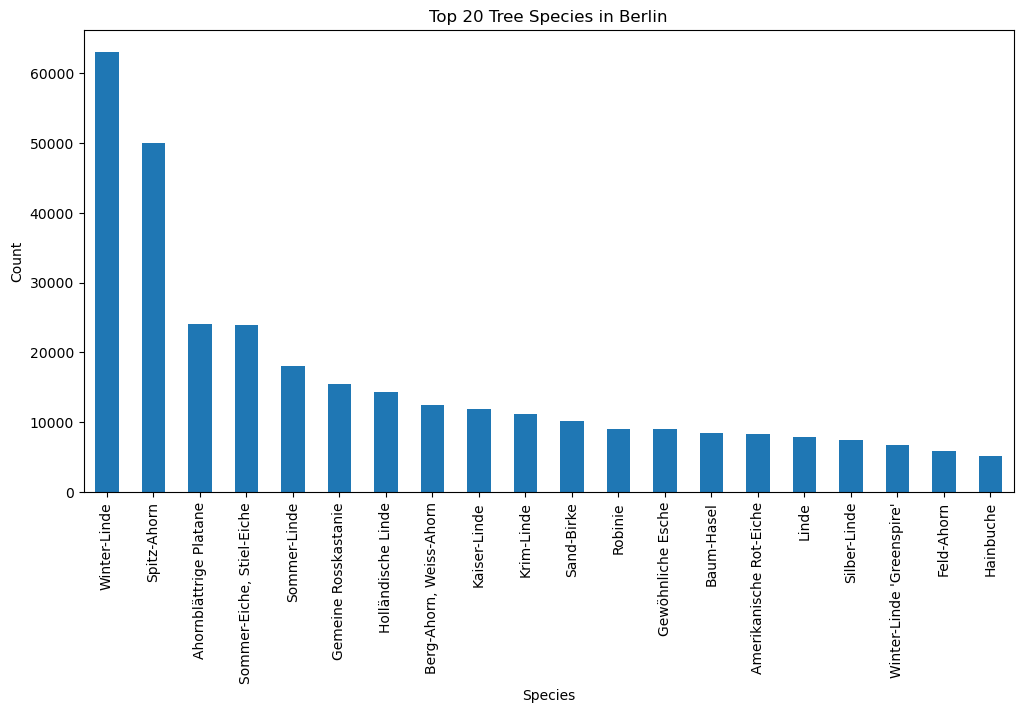

In [14]:

# Top 20 tree species distribution
if 'art_dtsch' in gdf.columns:
    species_counts = gdf['art_dtsch'].value_counts().head(20)
    species_counts.plot(kind='bar', figsize=(12,6))
    plt.title('Top 20 Tree Species in Berlin')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.show()
else:
    print('Column "art_dtsch" not found.')


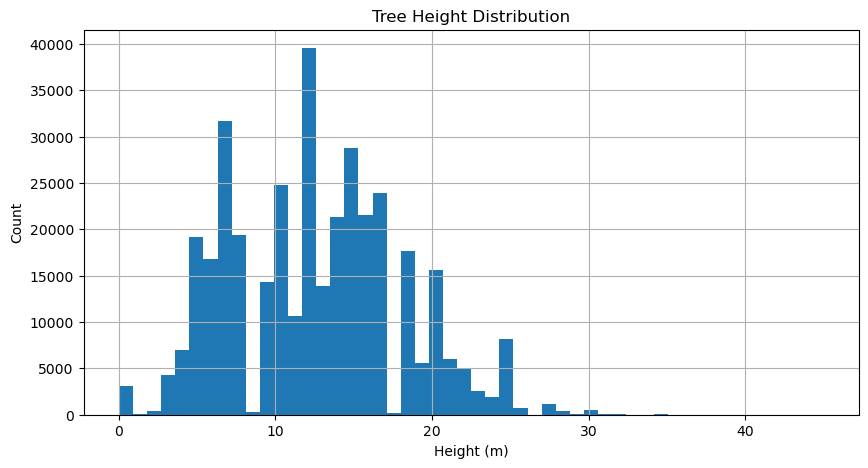

In [ ]:

# Tree height distribution
if 'baumhoehe' in gdf.columns:
    plt.figure(figsize=(10,5))
    gdf['baumhoehe'].hist(bins=50)
    plt.title('Tree Height Distribution')
    plt.xlabel('Height (m)')
    plt.ylabel('Count')
    plt.show()


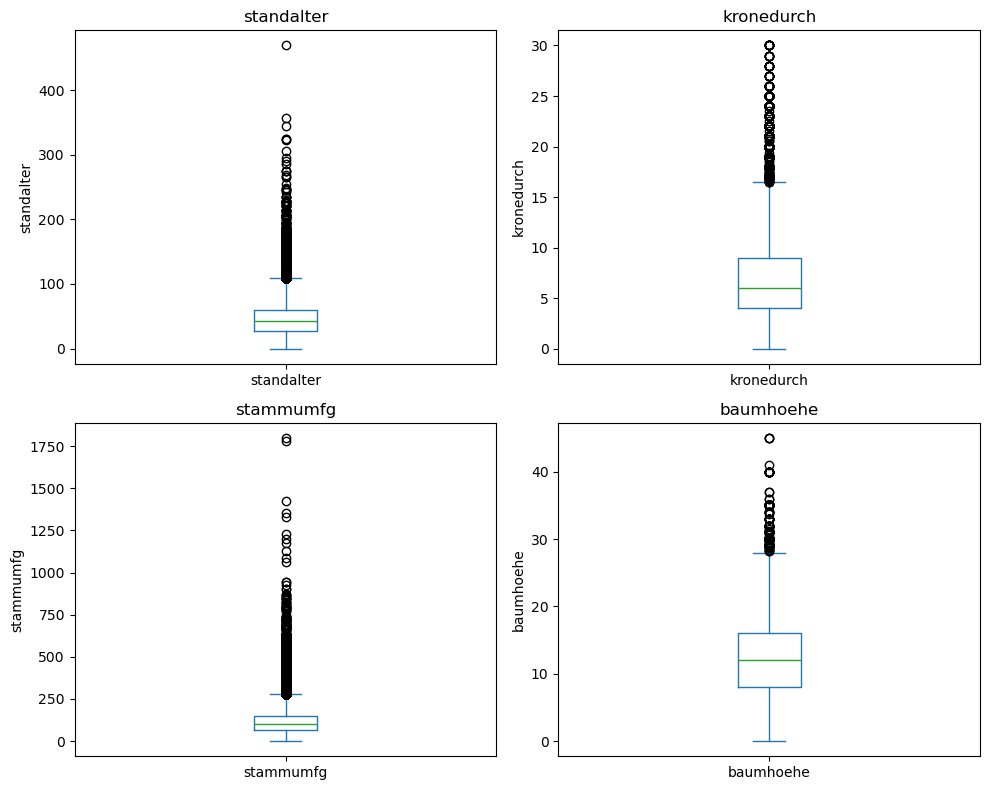

In [5]:
import matplotlib.pyplot as plt

cols = ["standalter", "kronedurch", "stammumfg", "baumhoehe"]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    gdf[col].dropna().plot(
        kind="box",
        ax=ax
    )
    ax.set_title(col)
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


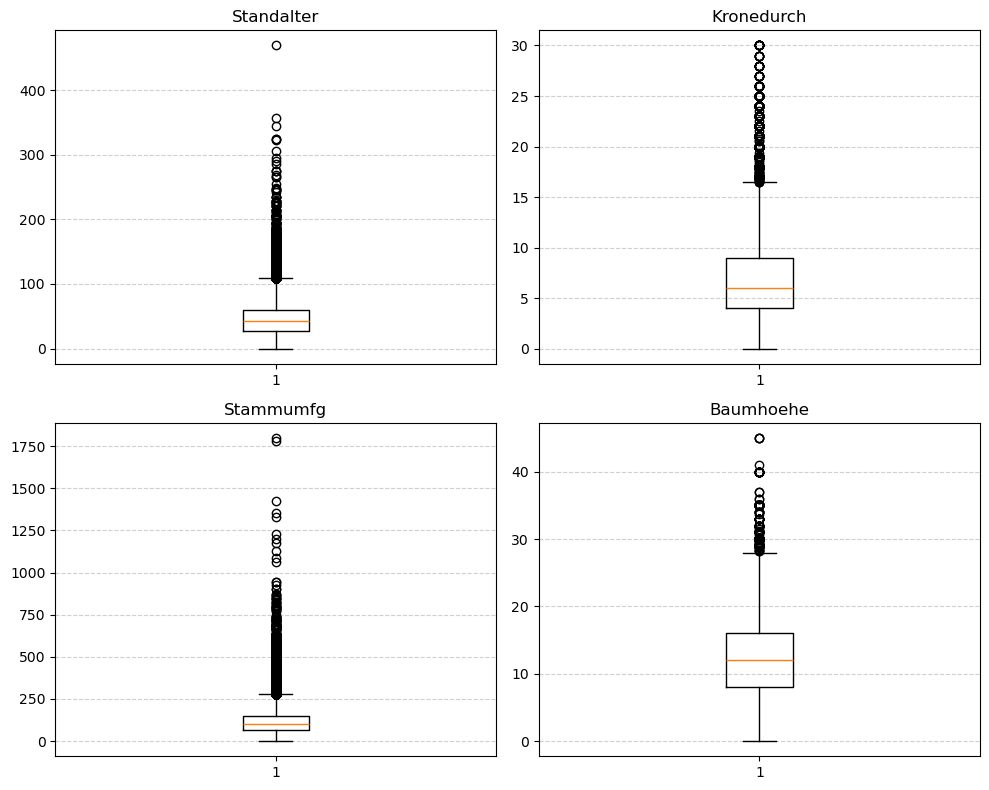

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    ax.boxplot(gdf[col].dropna(), vert=True)
    ax.set_title(col.replace("_", " ").title())
    ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


In [7]:
tallest_tree = gdf.loc[gdf["baumhoehe"].idxmax()]
tallest_tree


id                             strassenbaeume.00008100_001f1983
gisid                                         00008100_001f1983
pitid                                         00008100:001f1983
standortnr                                                   24
kennzeich                                                13SB14
namenr                                            Oberseestraße
art_dtsch                         Italienische Pyramiden-Pappel
art_bot                                 Populus nigra 'Italica'
gattung_deutsch                                          PAPPEL
gattung                                                 POPULUS
art_gruppe                                            Laubbäume
strname                                           Oberseestraße
hausnr                                                     None
zusatz                                                     None
pflanzjahr                                                 1850
standalter                              

In [8]:
oldest_tree = gdf.loc[gdf["standalter"].idxmax()]
oldest_tree


id                             strassenbaeume.00008100_001bddb3
gisid                                         00008100_001bddb3
pitid                                         00008100:001bddb3
standortnr                                                  151
kennzeich                                                 43628
namenr                                            Wulkower Str.
art_dtsch                                               Robinie
art_bot                                    Robinia pseudoacacia
gattung_deutsch                                         ROBINIE
gattung                                                 ROBINIA
art_gruppe                                            Laubbäume
strname                                         Wulkower Straße
hausnr                                                     None
zusatz                                                     None
pflanzjahr                                                 1556
standalter                              

## Geographic Distribution (Scatter Plot)
Note: This uses lon/lat columns, typically named *'spatial_longitude'* and *'spatial_latitude'*, but adjust based on your dataset.

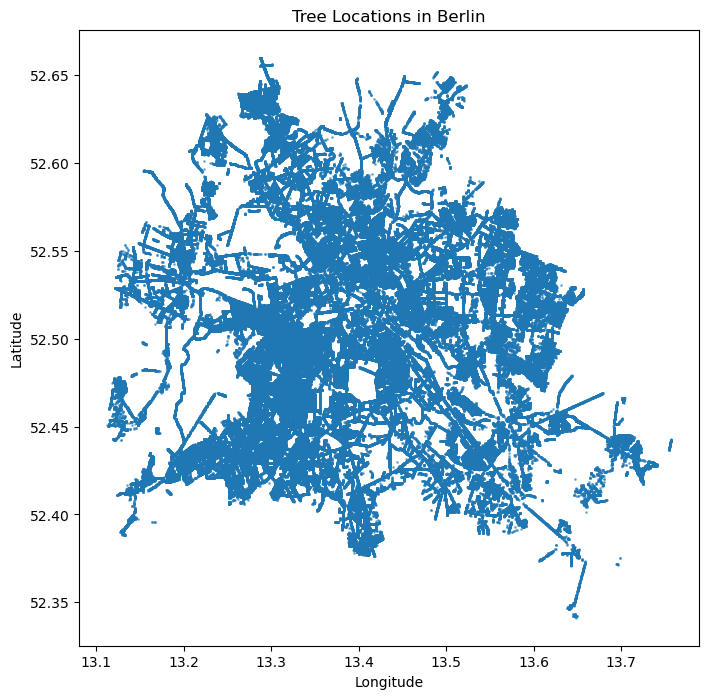

                      art_dtsch                   geometry
142073  Amerikanische Rot-Eiche  POINT (13.30284 52.56885)
391243             Winter-Linde  POINT (13.20312 52.52246)
118989     Gemeine Rosskastanie  POINT (13.31878 52.62483)
235092              Spitz-Ahorn  POINT (13.47082 52.49524)
181233                Hainbuche  POINT (13.39347 52.38763)


In [17]:

# Geographic scatter plot of trees
plt.figure(figsize=(8,8))
plt.scatter(gdf.geometry.x, gdf.geometry.y, s=1, alpha=0.5)
plt.title('Tree Locations in Berlin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Optional: sample 5 trees with their species and coordinates
print(gdf[['art_dtsch', 'geometry']].sample(5))


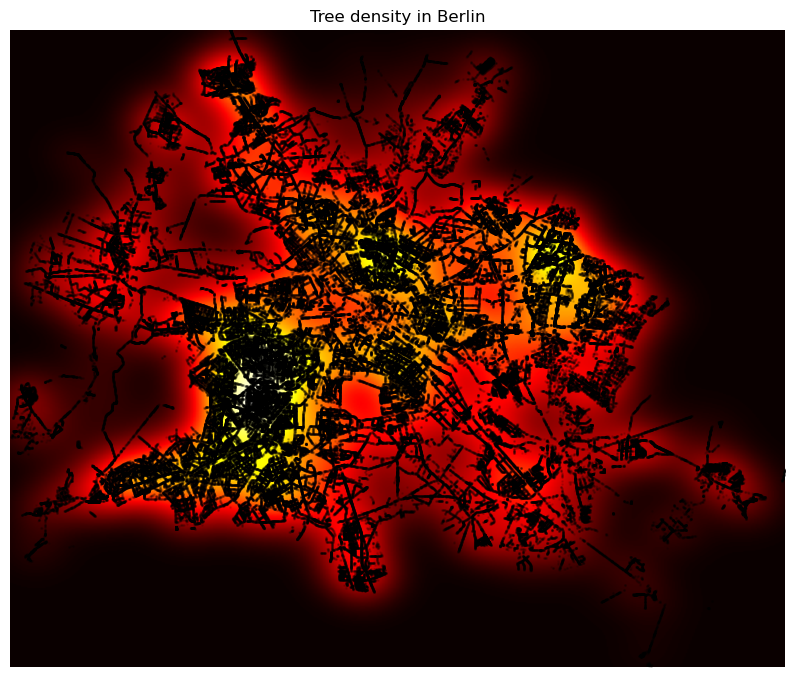

In [3]:
# need meters, not degrees
gdf = gdf.to_crs(epsg=25833)

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# extract coordinates
x = gdf.geometry.x
y = gdf.geometry.y

# KDE
kde = gaussian_kde([x, y], bw_method=0.15)

# grid for evaluation
xmin, ymin, xmax, ymax = gdf.total_bounds
xx, yy = np.mgrid[xmin:xmax:500j, ymin:ymax:500j]
zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)

# plot
plt.figure(figsize=(10, 10))
plt.imshow(
    zz.T,
    origin="lower",
    extent=[xmin, xmax, ymin, ymax],
    cmap="hot"
)
plt.scatter(x, y, s=1, c="black", alpha=0.1)
plt.title("Tree density in Berlin")
plt.axis("off")
plt.show()
